Import required libaries

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

Then we insert all the required connection properties

In [2]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=LAPTOP-VGURO3ML\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [3]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [4]:
query = 'SELECT P.BusinessEntityID, P.FirstName, P.LastName, E.VacationHours, S.Bonus FROM Person.Person P INNER JOIN HumanResources.Employee E ON P.BusinessEntityID = E.BusinessEntityID INNER JOIN Sales.SalesPerson S ON P.BusinessEntityID = S.BusinessEntityID'

Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [5]:
salesdata = pd.read_sql(query, conn)

C:\Users\Griffin\AppData\Local\Temp\ipykernel_61208\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


Let's get a preview of what our data looks like:

In [6]:
print(salesdata.head())

   BusinessEntityID FirstName  LastName  VacationHours   Bonus
0               274   Stephen     Jiang             14     0.0
1               275   Michael    Blythe             38  4100.0
2               276     Linda  Mitchell             27  2000.0
3               277   Jillian    Carson             24  2500.0
4               278   Garrett    Vargas             33   500.0


Lastly i create a scatter plot using two of the fields returned from the database

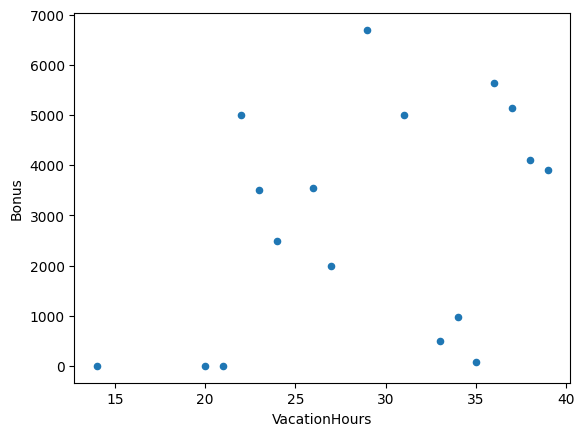

In [7]:
salesdata.plot.scatter(x='VacationHours',y='Bonus')

# Show the data in a chart
plt.show()

Now you can reverse engineer the code I have shown you above to create your own projects